In [1]:
import sys
sys.path.insert(0,'..')

from src.models import *
from src.loss_functions import *
from src.noise import *
from src.metrics import *
from src.plotting import *
from src.generate_data import *
from src.real_data import *

import sklearn
import pandas as pd

from scipy.stats import bernoulli

from operator import xor

import os


In [2]:
def load_metrics(model_type, noise_type, uncertainty_type, dataset = 'cshock_eicu', fixed_class = None, fixed_noise = None):
    parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
    files_path = os.path.join(parent_dir, "results", "raw", "metrics", dataset , model_type, noise_type)
    if noise_type == "class_conditional":
        path = os.path.join(files_path, f"{fixed_class}_{fixed_noise}_{uncertainty_type}_metrics.pkl")

    else:
        path = os.path.join(files_path, f"{uncertainty_type}_metrics.pkl")
        
    with open(path, 'rb') as file:
        # Use pickle to read the dictionary to the file
        metrics = pkl.load(file)
        
    return metrics



/fs01/home/snagaraj/noise_multiplicity/results/raw/metrics/cshock_eicu/LR/class_independent/forward_metrics.pkl
448


/h/snagaraj/.conda/envs/noisyTS/lib/python3.10/site-packages/matplotlib/cbook.py:1261: RuntimeWarning: invalid value encountered in scalar multiply
  loval = q1 - whis * stats['iqr']
/h/snagaraj/.conda/envs/noisyTS/lib/python3.10/site-packages/matplotlib/cbook.py:1262: RuntimeWarning: invalid value encountered in scalar multiply
  hival = q3 + whis * stats['iqr']
/h/snagaraj/.conda/envs/noisyTS/lib/python3.10/site-packages/matplotlib/cbook.py:1261: RuntimeWarning: invalid value encountered in scalar multiply
  loval = q1 - whis * stats['iqr']
/h/snagaraj/.conda/envs/noisyTS/lib/python3.10/site-packages/matplotlib/cbook.py:1262: RuntimeWarning: invalid value encountered in scalar multiply
  hival = q3 + whis * stats['iqr']
/h/snagaraj/.conda/envs/noisyTS/lib/python3.10/site-packages/matplotlib/cbook.py:1261: RuntimeWarning: invalid value encountered in scalar multiply
  loval = q1 - whis * stats['iqr']
/h/snagaraj/.conda/envs/noisyTS/lib/python3.10/site-packages/matplotlib/cbook.py:1262

/fs01/home/snagaraj/noise_multiplicity/results/raw/metrics/cshock_eicu/LR/class_independent/backward_torch_metrics.pkl
448


/h/snagaraj/.conda/envs/noisyTS/lib/python3.10/site-packages/matplotlib/cbook.py:1261: RuntimeWarning: invalid value encountered in scalar multiply
  loval = q1 - whis * stats['iqr']
/h/snagaraj/.conda/envs/noisyTS/lib/python3.10/site-packages/matplotlib/cbook.py:1262: RuntimeWarning: invalid value encountered in scalar multiply
  hival = q3 + whis * stats['iqr']
/fs01/home/snagaraj/noise_multiplicity/src/../src/plotting.py:572: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  sns.stripplot(x="Noise Level (%)", y="Rate (%)", hue="Loss Function", data=df, jitter=True, dodge=True,


/fs01/home/snagaraj/noise_multiplicity/results/raw/metrics/cshock_eicu/LR/class_independent/backward_sk_metrics.pkl
692


/h/snagaraj/.conda/envs/noisyTS/lib/python3.10/site-packages/matplotlib/cbook.py:1261: RuntimeWarning: invalid value encountered in scalar multiply
  loval = q1 - whis * stats['iqr']
/h/snagaraj/.conda/envs/noisyTS/lib/python3.10/site-packages/matplotlib/cbook.py:1262: RuntimeWarning: invalid value encountered in scalar multiply
  hival = q3 + whis * stats['iqr']
/fs01/home/snagaraj/noise_multiplicity/src/../src/plotting.py:572: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  sns.stripplot(x="Noise Level (%)", y="Rate (%)", hue="Loss Function", data=df, jitter=True, dodge=True,


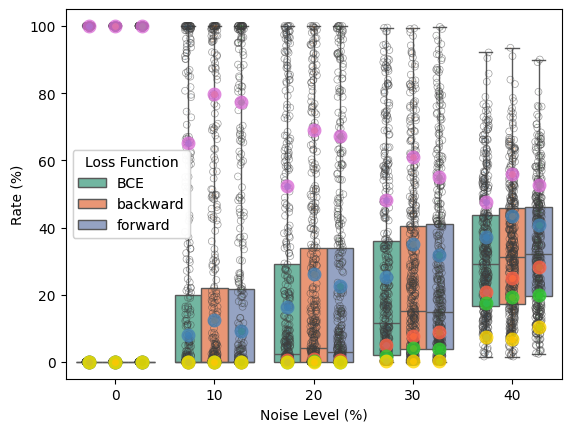

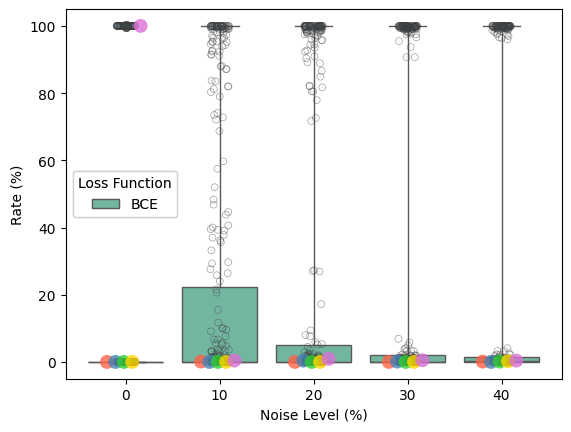

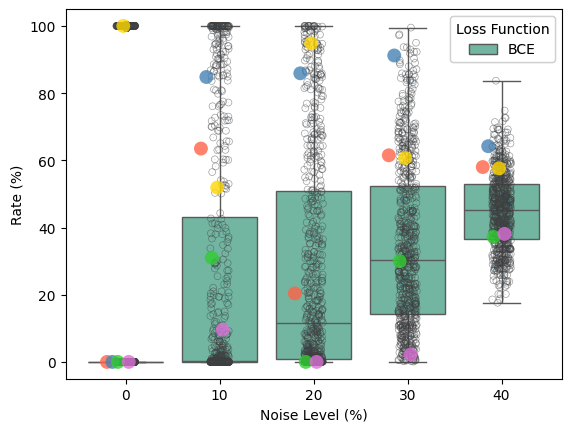

In [41]:
model_type = "LR"
noise_type = "class_independent"
uncertainty_type = "forward"
fixed_class = 0
fixed_noise = 0.0

dataset = "cshock_eicu"


for uncertainty_type in ["forward", "backward_torch","backward_sk"]:
    metrics = load_metrics(model_type, noise_type, uncertainty_type, dataset = dataset, fixed_class=fixed_class, fixed_noise = fixed_noise)
    print(len(metrics.data['BCE'][0.0]['regret_train']))
    plt.figure()
    df = plot_metric(metrics,  'regret_test')
    #plt.savefig("test.pdf")

In [40]:
len(metrics.data['BCE'][0.0]['regret_train'])

692